In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   object 
 10  price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


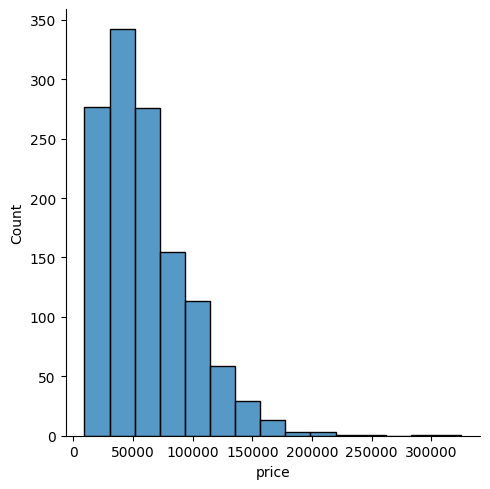

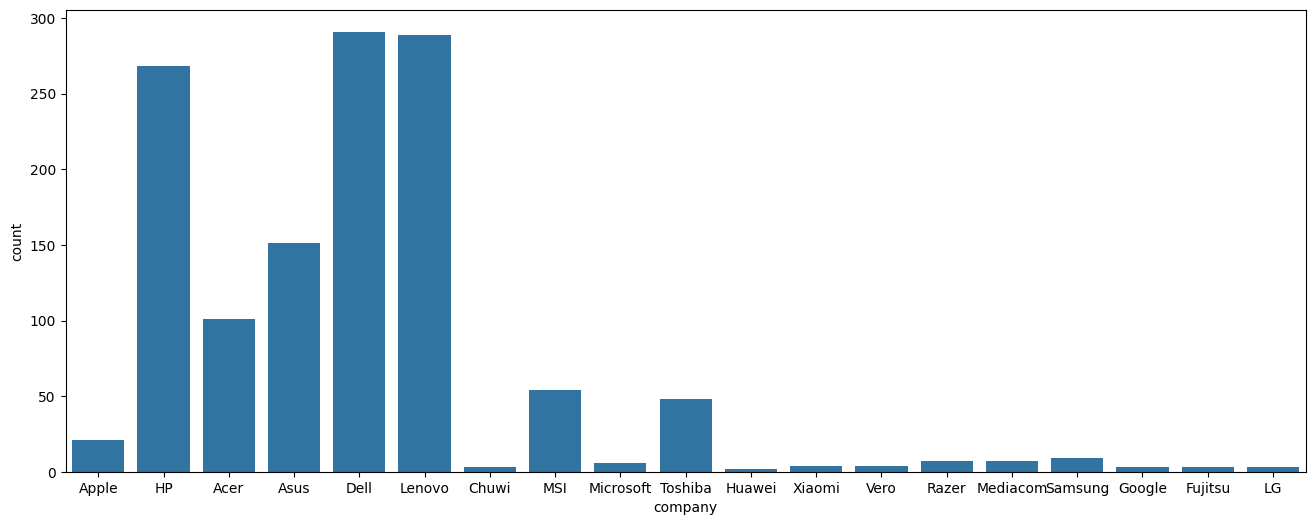

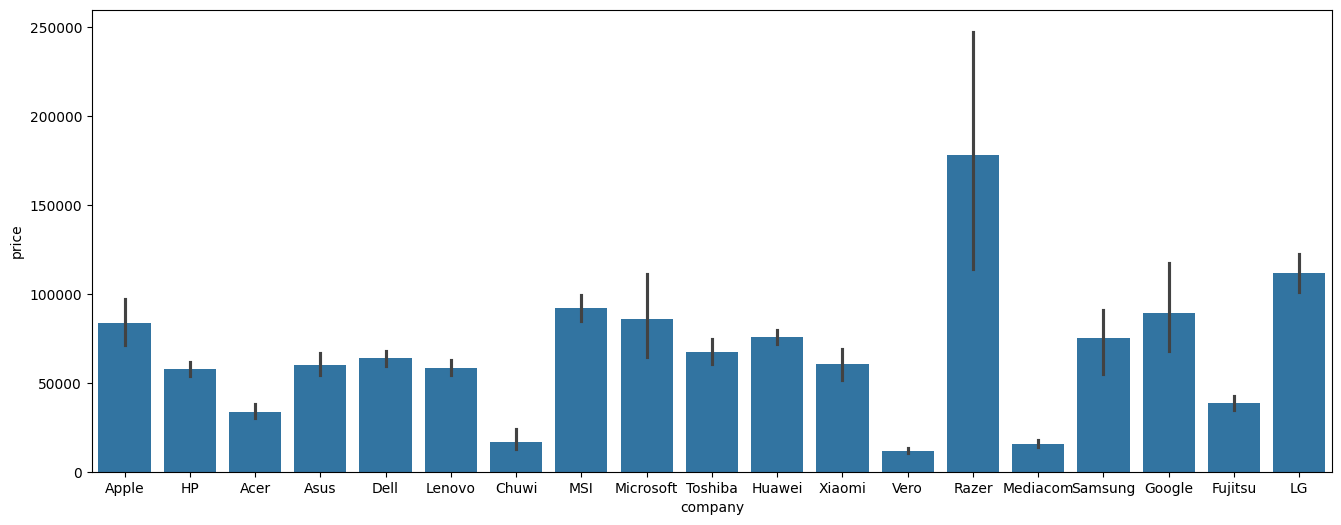

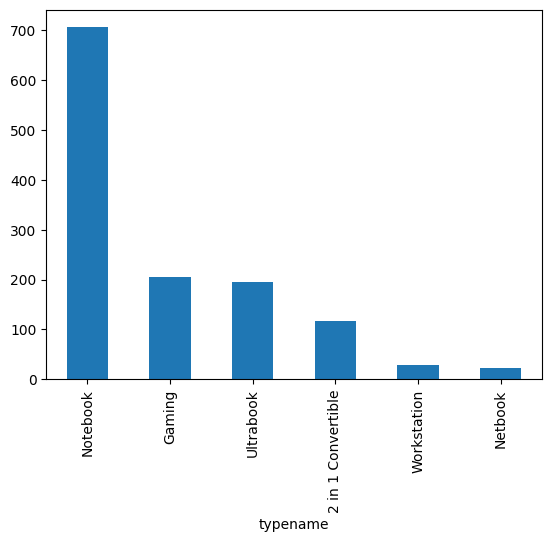

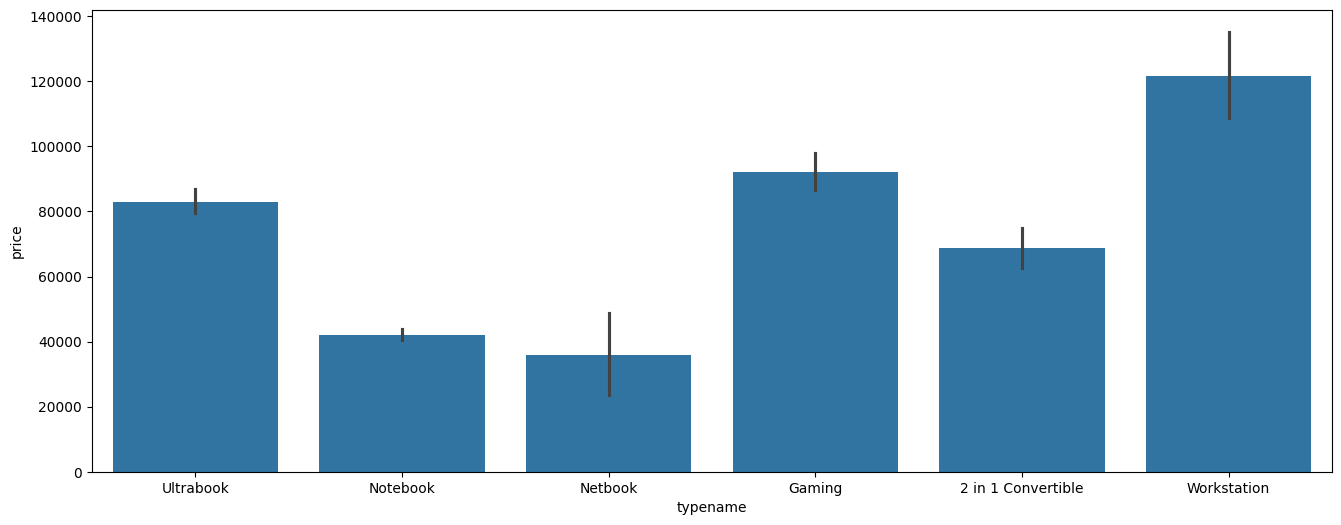

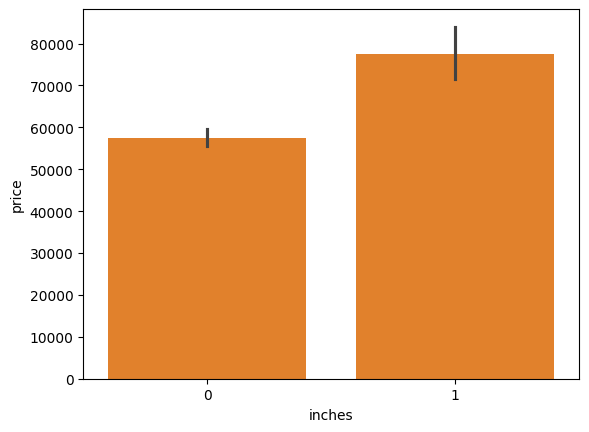

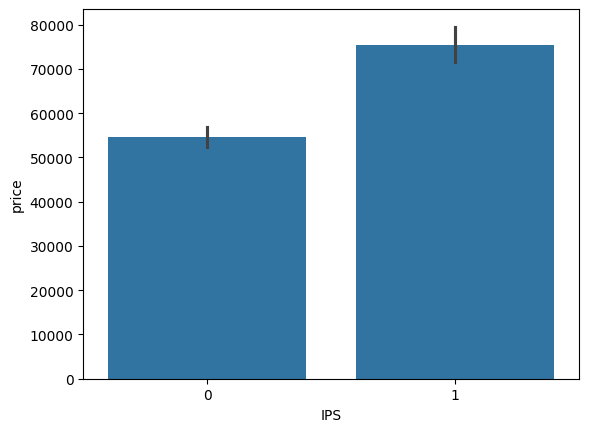

<Axes: xlabel='cpu brand'>

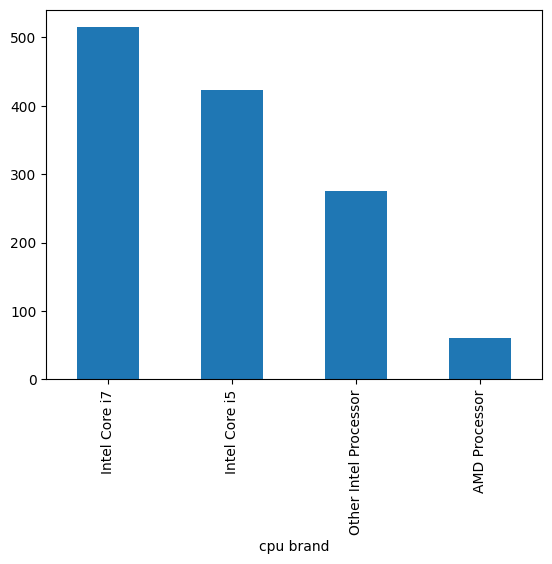

In [4]:
data = data.drop(columns=['Unnamed: 0'])

data.columns = data.columns.str.lower()

data['ram'] = data['ram'].str.replace("GB", "")

data['ram'] = data['ram'].astype('int32')

data.info()

data['weight'] = data['weight'].str.replace("kg", "")

data['weight'] = data['weight'].astype('float32')

data.duplicated().sum()

data = data.drop_duplicates()

# EDA

sns.displot(x='price', bins=15, data=data)
plt.show()

plt.figure(figsize=(16,6))
sns.countplot(x='company', data=data)
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(x='company', y='price', data=data)
plt.show()

data['typename'].value_counts().plot(kind='bar')

plt.figure(figsize=(16,6))
sns.barplot(x='typename', y='price', data=data)
plt.show()

sns.scatterplot(x='inches', y='price', data=data)

data['screenresolution'].value_counts()

data['touchscreen'] = data['screenresolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# plt.figure(figsize=(16,6))
sns.barplot(x='touchscreen', y='price', data=data)
plt.show()

data['IPS'] = data['screenresolution'].apply(lambda x:1 if 'IPS' in x else 0)

sns.barplot(x='IPS', y='price', data=data)
plt.show()

new = data['screenresolution'].str.split('x', n=1, expand=True)

new.head()

data['x_res'] = new[0]
data['y_res'] = new[1]

data['x_res'] = data['x_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

data['x_res'] = data['x_res'].astype('int32')

data['y_res'] = data['y_res'].astype('int32')

data['ppi'] = ((((data['x_res']**2)+(data['y_res']**2))**0.5)/data['inches']).astype(float)

data = data.drop(columns=['screenresolution', 'x_res', 'y_res'])

data['cpu name'] = data['cpu'].apply(lambda x:" ".join(x.split()[0:3]))

data.head()

def idk(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5':
        return text
    else:
        if text.split()[0] == 'Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

data['cpu brand'] = data['cpu name'].apply(idk)

data['cpu brand'].value_counts().plot(kind='bar')

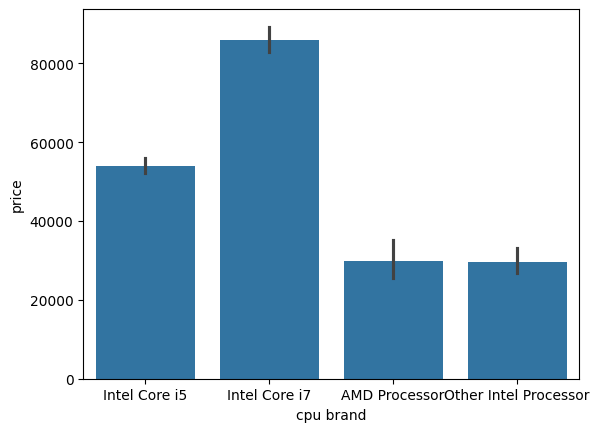

In [5]:
sns.barplot(x='cpu brand', y='price', data=data)
plt.show()

In [6]:
data = data.drop(columns=['cpu', 'cpu name'])

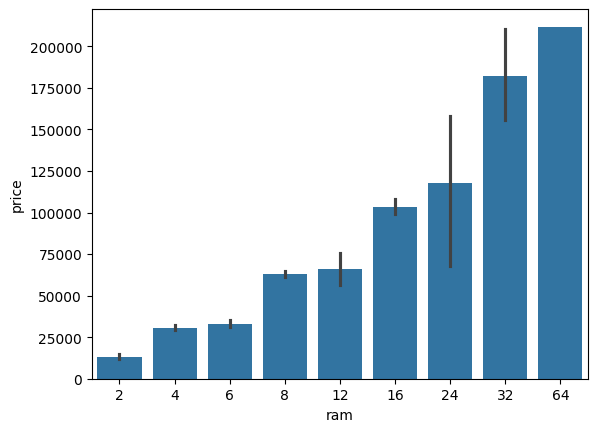

In [7]:
sns.barplot(x='ram', y='price', data=data)
plt.show()

In [8]:
data['memory'].value_counts()

memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [9]:
data['memory'] =  data['memory'].str.replace("\.0", "")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\HP\AppData\Local\Temp\ipykernel_4288\2926038566.py:1: SyntaxWarning: invalid escape sequence '\.'
  data['memory'] =  data['memory'].str.replace("\.0", "")


In [10]:
data['memory'] =  data['memory'].str.replace("GB", "")
data['memory'] =  data['memory'].str.replace("TB", "000")

In [11]:
new = data['memory'].str.split("+", n=1, expand=True)

In [12]:
data.head(2)

,company,typename,inches,ram,memory,gpu,opsys,weight,price,touchscreen,IPS,ppi,cpu brand
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [13]:
data["first"]= new[0]
data["first"]=data["first"].str.strip()

In [14]:
data["secong"]= new[1]

In [15]:
data['HDD'] = data['first'].apply(lambda x: 1 if "HDD" in x else 0)
data['SDD'] = data['first'].apply(lambda x: 1 if "SSD" in x else 0)
data['FS'] = data['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['Hybrid'] = data['first'].apply(lambda x: 1 if "Hybrid" in x else 0)

In [16]:
data['first'] = data['first'].str.replace(r'\D', '')

In [17]:
data['secong'] = data['secong'].fillna("0")

In [18]:
data['HDD2'] = data['secong'].apply(lambda x: 1 if "HDD" in x else 0)
data['SDD2'] = data['secong'].apply(lambda x: 1 if "SSD" in x else 0)
data['FS2'] = data['secong'].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['Hybrid2'] = data['secong'].apply(lambda x: 1 if "Hybrid" in x else 0)

In [19]:
data['first'] = data['first'].str.replace(r'\D', '', regex=True)

data['first'] = data['first'].astype(int)

In [20]:
data['secong'] = data['secong'].str.replace(r'\D', '', regex=True)

data['secong'] = data['secong'].astype(int)

In [21]:
data["HDD1"]=(data["first"]*data["HDD"]+data["secong"]*data["HDD2"])

data["SSD"]=(data["first"]*data["SDD"]+data["secong"]*data["SDD2"])

data["Flash Storage"]=(data["first"]*data["FS"]+data["secong"]*data["FS2"])

data["Hybrid1"]=(data["first"]*data["Hybrid"]+data["secong"]*data["Hybrid2"])

In [22]:
data.drop(columns=['first', 'secong', 'HDD', 'SDD', 'Hybrid',
       'FS', 'HDD2', 'SDD2', 'Hybrid2',
       'FS2'],inplace=True)

In [36]:
data.drop(columns=['memory'], inplace=True)
# data.drop(columns=['Hybrid1','Flash Storage'],inplace=True)

In [24]:
data['gpu brand'] = data['gpu'].apply(lambda x:x.split()[0])
data.drop(columns=['gpu'], inplace=True)
data = data[data['gpu brand'] != 'ARM']

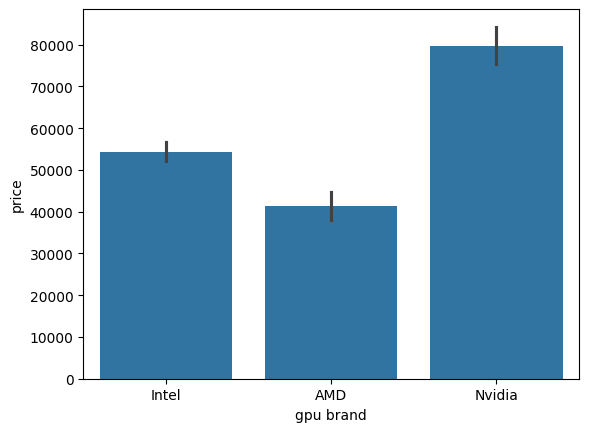

In [25]:
sns.barplot(x='gpu brand', y='price', data=data)
plt.show()

In [26]:
data['opsys'].value_counts()

opsys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [27]:
def idk(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    else:
        if text == 'Mac OS X' or text == 'macOS': 
            return 'Mac'
        else:
            return 'Others/No OS/Linux'

In [28]:
data['os'] = data['opsys'].apply(idk)

In [29]:
data.drop(columns=['opsys'], inplace=True)

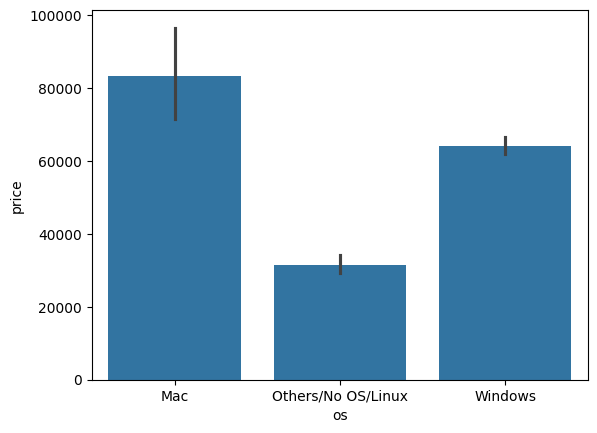

In [30]:
sns.barplot(x='os', y='price', data=data)
plt.show()

<Axes: xlabel='weight', ylabel='price'>

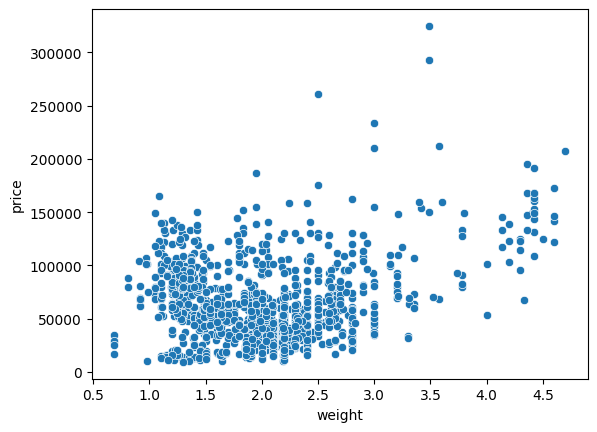

In [31]:
sns.scatterplot(x='weight', y='price', data=data)

# Prediction Modelling

In [65]:
x = data.drop(columns=['price'])
y = np.log(data['price'])

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [68]:
x_train.head(2)

,company,typename,inches,ram,weight,touchscreen,IPS,ppi,cpu brand,HDD1,SSD,gpu brand,os
716,Dell,Notebook,15.6,8,1.9,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,15.6,8,2.5,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [70]:
transformer = ColumnTransformer(transformers=[
   ('ohe', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 8, 11, 12])
], remainder='passthrough')

In [71]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# LINEAR REGRESSION

model = LinearRegression()

In [74]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 71.94346298231457
Mean absolute error: 21.9351162015431


# RIGDE REGRESSION

In [75]:
model2 = Ridge()

In [76]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model2)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 72.30920116325544
Mean absolute error: 21.703147525067003


In [80]:
model4 = KNeighborsRegressor()

In [81]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model4)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 72.49958762546464
Mean absolute error: 21.02231648910296


In [82]:
model5 = DecisionTreeRegressor()

In [83]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model5)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 77.18117591834779
Mean absolute error: 20.45327425370323


In [86]:
model6 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [87]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model6)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 81.22832879592742
Mean absolute error: 18.02125412652443


In [88]:
model7 = SVR(kernel='rbf',C=10000,epsilon=0.1)

In [89]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model7)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 77.41857763688871
Mean absolute error: 20.25491764754805


In [92]:
model8 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              # max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [93]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model8)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 80.32171419969023
Mean absolute error: 18.41446542812819


In [94]:
model9 = GradientBoostingRegressor(n_estimators=500)

In [95]:
pipe = Pipeline([
    ('step1', transformer),
    ('step2', model9)
])
pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)
print("Score:", r2_score(y_pred, y_test)*100)
print("Mean absolute error:", mean_absolute_error(y_pred, y_test)*100)

Score: 84.4470799062644
Mean absolute error: 17.41608251631521


In [96]:
def predict_price(company, typename, ram, weight, touchscreen, ips, inches, screen_resolution,
                  cpu_brand, hdd, ssd, gpu_brand, os):

    X_res = int(screen_resolution.split('x')[0])
    Y_res = int(screen_resolution.split('x')[1])
    ppi = ((X_res**2 + Y_res**2)**0.5) / inches

    input_df = pd.DataFrame([[
        company, typename, ram, weight, touchscreen, ips, inches, ppi,
        cpu_brand, hdd, ssd, gpu_brand, os
    ]], columns=['company', 'typename', 'ram', 'weight', 'touchscreen', 'IPS', 'inches', 'ppi',
                 'cpu brand', 'HDD1', 'SSD', 'gpu brand', 'os'])

    log_price = pipe.predict(input_df)[0]
    return int(np.exp(log_price))

print("\n💻 Laptop Price Predictor - Please enter the following specs:\n")
company = input("1. Brand (e.g. Dell/HP/Apple/Lenovo): ").strip()
typename = input("2. Type (Notebook/Gaming/Ultrabook/etc): ").strip()
ram = int(input("3. RAM (GB): "))
weight = float(input("4. Weight (kg): "))
touchscreen = input("5. Touchscreen? (yes/no): ").strip().lower()
touchscreen = 1 if touchscreen == "yes" else 0
ips = input("6. IPS Display? (yes/no): ").strip().lower()
ips = 1 if ips == "yes" else 0
inches = float(input("7. Screen size (inches): "))
screen_resolution = input("8. Screen resolution (e.g., 1920x1080): ").strip()
cpu_brand = input("9. CPU Brand (Intel Core i5/i7/Other Intel Processor/AMD Processor): ").strip()
hdd = int(input("10. HDD (in GB, e.g., 0/500/1000): "))
ssd = int(input("11. SSD (in GB, e.g., 0/128/256/512): "))
gpu_brand = input("12. GPU Brand (Intel/Nvidia/AMD): ").strip()
os = input("13. Operating System (Windows/Mac/Others/No OS/Linux): ").strip()

price = predict_price(company, typename, ram, weight, touchscreen, ips, inches,
                      screen_resolution, cpu_brand, hdd, ssd, gpu_brand, os)
print(f"\n💰 Predicted Laptop Price: ₹{price}")


💻 Laptop Price Predictor - Please enter the following specs:



1. Brand (e.g. Dell/HP/Apple/Lenovo):  Apple
2. Type (Notebook/Gaming/Ultrabook/etc):  Notebook
3. RAM (GB):  8
4. Weight (kg):  1.9
5. Touchscreen? (yes/no):  yes
6. IPS Display? (yes/no):  no
7. Screen size (inches):  141
8. Screen resolution (e.g., 1920x1080):  1920x1080
9. CPU Brand (Intel Core i5/i7/Other Intel Processor/AMD Processor):  Intel Core i5
10. HDD (in GB, e.g., 0/500/1000):  500
11. SSD (in GB, e.g., 0/128/256/512):  128
12. GPU Brand (Intel/Nvidia/AMD):  AMD
13. Operating System (Windows/Mac/Others/No OS/Linux):  Mac



💰 Predicted Laptop Price: ₹31362
